### Imports

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
import csv
import pydot
import xgboost as xgb
import math 
import seaborn as sns
import scipy.stats as stats

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.metrics import roc_curve, auc


### Datos de entrenamiento (data_PQL)

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
datos_train = pd.read_excel("/Users/puil/OneDrive/Escritorio/EAE/Data science y machine learning/Trabajo Final/data_PQL.xlsx")
# Cargamos los datos data_PQL

In [4]:
datos_train1 = datos_train.iloc[:,0:46]
datos_train2 = datos_train.iloc[:,46:]

Creamos dos dataframe 
1)	Con las primeras 46 columnas 

2)	De la columna 46 hasta el final 


In [5]:
datos_train1 = datos_train1.drop(columns=["starts_2day","starts_4day", "starts_6day", "starts_8day", "starts_10day", "starts_12day","starts_14day", "starts_16day", "starts_18day", "starts_20day", "starts_22day", "starts_24day", "starts_26day","starts_28day","starts_30day"])
# Eliminamos las columnas day del dataframe 1 

In [6]:
datos_train1 = datos_train1.drop(columns=["Social Post ClickC",  "VideoC", "Landing Page TrackerC", "Paid Search AdC" ])
# Eliminamos columnas del dataframe 1

In [7]:
IsWon = datos_train["IsWon"]
id = datos_train["id"]
# Creamos dos variables con las columnas id y IsWon

datos_train1["IsWon"]= IsWon
datos_train1["id"] = id
# Añadimos las columnas id y IsWon presentes en el dataframe 2 al dataframe 1 

In [8]:
train_regre = datos_train1.iloc[:,0:44]
train_regre["id"]= id


In [9]:
train_regre["industry"] = train_regre["industry"].replace(["healthcare_pharma_biotech"], "Healthcare/Pharmaceuticals/Biotech")
train_regre["industry"] = train_regre["industry"].replace(["Healthcare"], "Healthcare/Pharmaceuticals/Biotech")
train_regre["industry"] = train_regre["industry"].replace(["Retail"], "Retail/Wholesale")
train_regre["industry"] = train_regre["industry"].replace(["Software"], "Software/Internet")

train_regre["job_function"] = train_regre["job_function"].replace(["biz_management"], "Business - Management")
train_regre["job_function"] = train_regre["job_function"].replace(["Business - Analyst"], "Business Analyst")
train_regre["job_function"] = train_regre["job_function"].replace(["Management"], "Business - Management")
train_regre["job_function"] = train_regre["job_function"].replace(["Researcher"], "Research")

train_regre["job_title"] = train_regre["job_title"].replace(["Assistant Provost"], "Assistant Professor")
train_regre["job_title"] = train_regre["job_title"].replace(["Associate Professor"], "Assistant Professor")
train_regre["job_title"] = train_regre["job_title"].replace(["Data Scientist Consultant"], "Data Scientist/ consultant")
train_regre["job_title"] = train_regre["job_title"].replace(["Mr."], "Marketing")

train_regre["country"] = train_regre["country"].replace(["F1."], "Finland")
train_regre["country"] = train_regre["country"].replace(["CO"], "Colombia")
train_regre["country"] = train_regre["country"].replace(["NZ"], "New Zealand")
train_regre["country"] = train_regre["country"].replace(["AE"], "United Arabes Emirates")
train_regre["country"] = train_regre["country"].replace(["US"], "United States")
train_regre["country"] = train_regre["country"].replace(["USA"], "United States")
train_regre["country"] = train_regre["country"].replace(["GB"], "United Kingdom")
train_regre["country"] = train_regre["country"].replace(["Schweiz"], "Switzerland")
train_regre["country"] = train_regre["country"].replace(["Russian Federation"], "Russia")

#Realizamos tareas de limpieza de datos utilizando la función replace 

In [10]:
Label_encoder = preprocessing.LabelEncoder()
train_regre["job_title"] = Label_encoder.fit_transform(train_regre["job_title"])
train_regre["job_function"] = Label_encoder.fit_transform(train_regre["job_function"])
train_regre["industry"] = Label_encoder.fit_transform(train_regre["industry"])
train_regre["country"] = Label_encoder.fit_transform(train_regre["country"])
# Codificamos las variables string  

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_train_regre = min_max_scaler.fit_transform(train_regre)
train_regre_norm= pd.DataFrame(x_scaled_train_regre, index=train_regre.index, columns=train_regre.columns)
display (train_regre_norm)
# Normalizamos los datos 

,starts_4day_Delta,starts_6day_Delta,starts_8day_Delta,starts_10day_Delta,starts_12day_Delta,starts_14day_Delta,starts_16day_Delta,starts_18day_Delta,starts_20day_Delta,starts_22day_Delta,...,Landing PageC,Page ViewC,Chat TranscriptC,Form TrackerC,country,industry,job_function,job_title,IsWon,id
0,0.019608,0.000000,0.041667,0.00,0.000000,0.035714,0.00000,0.0000,0.000000,0.000000,...,0.000000,0.100000,0.0,0.000000,0.722222,0.565217,0.84,0.240741,1.0,0.000000
1,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.0625,0.000000,0.000000,...,0.000000,0.016667,0.0,0.000000,1.000000,0.521739,0.12,0.592593,0.0,0.003030
2,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,...,0.037037,0.050000,0.0,0.000000,0.416667,0.608696,0.72,0.240741,0.0,0.006061
3,0.009804,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,...,0.055556,0.016667,0.0,0.000000,0.527778,0.043478,0.76,0.083333,1.0,0.012121
4,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,1.000000,0.434783,0.32,0.240741,1.0,0.015152
5,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.03125,0.0000,0.000000,0.000000,...,1.000000,0.200000,0.0,0.000000,0.611111,0.608696,0.76,0.018519,1.0,0.018182
6,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.444444,0.304348,0.16,0.962963,1.0,0.021212
7,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.333333,1.000000,0.043478,0.16,0.296296,1.0,0.024242
8,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.111111,0.826087,0.72,0.240741,0.0,0.027273
9,0.009804,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,0.0000,0.000000,0.000000,...,0.055556,0.016667,0.0,0.000000,0.527778,0.043478,0.76,0.083333,1.0,0.030303


### Datos Test (data_PQLpredict)

In [12]:
datos_test = pd.read_excel("/Users/puil/OneDrive/Escritorio/EAE/Data science y machine learning/Trabajo Final/data_PQLpredict.xlsx")


In [13]:
datos_test1 = datos_test.iloc[:,0:46]
datos_test2 = datos_test.iloc[:,46:]

In [14]:
datos_test1 = datos_test1.drop(columns=["starts_2day","starts_4day", "starts_6day", "starts_8day", "starts_10day", "starts_12day","starts_14day", "starts_16day", "starts_18day", "starts_20day", "starts_22day", "starts_24day", "starts_26day","starts_28day","starts_30day"])
# Eliminamos las columnas delta del dataframe 1 

In [15]:
datos_test1 = datos_test1.drop(columns=["Social Post ClickC",  "VideoC", "Landing Page TrackerC", "Paid Search AdC"  ])
# Eliminamos columnas del dataframe 1

In [16]:
test_regre = datos_test1.iloc[:,0:44]
test_regre["id"]= id

In [17]:
test_regre["industry"] = test_regre["industry"].replace(["healthcare_pharma_biotech"], "Healthcare/Pharmaceuticals/Biotech")
test_regre["industry"] = test_regre["industry"].replace(["Healthcare"], "Healthcare/Pharmaceuticals/Biotech")
test_regre["industry"] = test_regre["industry"].replace(["Retail"], "Retail/Wholesale")
test_regre["industry"] = test_regre["industry"].replace(["Software"], "Software/Internet")

test_regre["job_function"] = test_regre["job_function"].replace(["biz_management"], "Business - Management")
test_regre["job_function"] = test_regre["job_function"].replace(["Business - Analyst"], "Business Analyst")
test_regre["job_function"] = test_regre["job_function"].replace(["Management"], "Business - Management")
test_regre["job_function"] = test_regre["job_function"].replace(["Researcher"], "Research")

test_regre["job_title"] = test_regre["job_title"].replace(["Assistant Provost"], "Assistant Professor")
test_regre["job_title"] = test_regre["job_title"].replace(["Associate Professor"], "Assistant Professor")
test_regre["job_title"] = test_regre["job_title"].replace(["Data Scientist Consultant"], "Data Scientist/ consultant")
test_regre["job_title"] = test_regre["job_title"].replace(["Mr."], "Marketing")

test_regre["country"] = test_regre["country"].replace(["F1."], "Finland")
test_regre["country"] = test_regre["country"].replace(["CO"], "Colombia")
test_regre["country"] = test_regre["country"].replace(["NZ"], "New Zealand")
test_regre["country"] = test_regre["country"].replace(["AE"], "United Arabes Emirates")
test_regre["country"] = test_regre["country"].replace(["US"], "United States")
test_regre["country"] = test_regre["country"].replace(["USA"], "United States")
test_regre["country"] = test_regre["country"].replace(["GB"], "United Kingdom")
test_regre["country"] = test_regre["country"].replace(["Schweiz"], "Switzerland")
test_regre["country"] = test_regre["country"].replace(["Russian Federation"], "Russia")

#Realizamos tareas de limpieza de datos utilizando la función replace 

In [18]:
test_regre.to_excel(r'C:\Users\puil\OneDrive\Escritorio\6.7\power3.xlsx', index = False)

In [19]:
Label_encoder1 = preprocessing.LabelEncoder()
test_regre["job_title"] = Label_encoder1.fit_transform(test_regre["job_title"])
test_regre["job_function"] = Label_encoder1.fit_transform(test_regre["job_function"])
test_regre["industry"] = Label_encoder1.fit_transform(test_regre["industry"])
test_regre["country"] = Label_encoder1.fit_transform(test_regre["country"])
# Codificamos las variables string  

In [20]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_test_regre = min_max_scaler.fit_transform(test_regre)
test_regre_norm= pd.DataFrame(x_scaled_test_regre, index=test_regre.index, columns=test_regre.columns)
display (test_regre_norm)
# Normalizamos los datos 

,starts_4day_Delta,starts_6day_Delta,starts_8day_Delta,starts_10day_Delta,starts_12day_Delta,starts_14day_Delta,starts_16day_Delta,starts_18day_Delta,starts_20day_Delta,starts_22day_Delta,...,Form HandlerC,Landing PageC,Page ViewC,Chat TranscriptC,Form TrackerC,country,industry,job_function,job_title,id
0,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.00,0.166667,0.000000,0.000000,...,0.033333,0.000000,0.0000,0.0,0.0,0.2500,0.466667,0.333333,0.45,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.083333,...,0.066667,0.000000,0.0625,0.0,0.0,0.6875,0.333333,0.583333,0.25,0.017544
2,0.111111,0.000000,0.000000,0.000000,0.000000,0.083333,0.00,0.000000,0.000000,0.000000,...,0.033333,0.000000,0.1250,0.0,0.0,0.8750,0.266667,0.583333,0.25,0.035088
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.75,0.083333,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.0,0.0,0.5625,0.200000,0.833333,0.25,0.070175
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.033333,0.000000,0.0000,0.0,0.0,0.9375,0.666667,0.333333,0.25,0.087719
5,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.066667,0.000000,0.3125,0.0,0.0,0.6250,0.600000,0.250000,0.25,0.105263
6,0.111111,0.421053,0.346154,0.000000,0.000000,0.000000,0.00,0.000000,0.333333,0.000000,...,0.033333,0.000000,0.0000,0.0,0.0,0.9375,0.400000,0.666667,0.55,0.122807
7,0.000000,0.421053,0.038462,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.033333,0.000000,0.0000,0.0,0.0,0.3125,0.466667,0.583333,0.25,0.140351
8,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.00,0.000000,0.333333,0.000000,...,0.133333,0.000000,0.0000,0.0,0.0,0.3125,0.466667,0.833333,0.25,0.157895
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.033333,0.000000,0.0000,0.0,0.0,0.8750,0.333333,0.666667,0.25,0.175439


### Ramdom forest

In [21]:
train_regre_norm = train_regre_norm.drop(columns = ["id"])

In [22]:
X = train_regre_norm.drop(columns = ["IsWon"])
y = train_regre_norm["IsWon"]

In [23]:
# Utilizando la función de Skicit-Learn dividimos el set de datos en entreno y testeo   
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [24]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (211, 27)
Training Labels Shape: (211,)
Testing Features Shape: (71, 27)
Testing Labels Shape: (71,)


In [25]:
def generate_rf():
    rf = RandomForestClassifier(n_estimators=50, min_samples_leaf=3, max_depth = 32)
    rf.fit(train_features, train_labels)
    print ("rf score ", rf.score(test_features, test_labels), "\n")
    # Creamos una función la cual ejecute el ramdom forest classifier    
    return rf

In [26]:
rf = generate_rf()
# Generamos el ramdom forest classifier con la función previamente creada     

rf score  0.704225352112676 



In [27]:
predict_test = rf.predict(test_features)
# Utilizamos la función predict para predecir valores label a partir del modelo entrenado      

In [28]:
def metricas_rf():
    # Creamos una función que nos permite ver las métricas del modelo       
    print(classification_report(test_labels, predict_test))

In [29]:
metricas_rf()

              precision    recall  f1-score   support

         0.0       0.69      0.62      0.66        32
         1.0       0.71      0.77      0.74        39

    accuracy                           0.70        71
   macro avg       0.70      0.70      0.70        71
weighted avg       0.70      0.70      0.70        71



In [30]:
performance_auc = {}

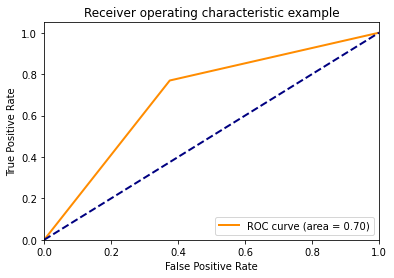

In [33]:
fpr, tpr, thresholds = roc_curve(test_labels, predict_test)
roc_auc = auc(fpr, tpr)
performance_auc['Random Forest'] = roc_auc

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

In [34]:
# Guardamos los nombres de las columnas para su uso posterior        
feature_list = list(train_regre_norm.columns)
feature_list.remove("IsWon")

In [35]:
# Extraemos un árbol del ramdom forest         
tree = rf.estimators_[1]
# Exportamos la imagen a un dot file         
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Utilizamos la dot file para crear un grafico          
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Transformamos el formato del grafico a png           
graph.write_png('tree.png')

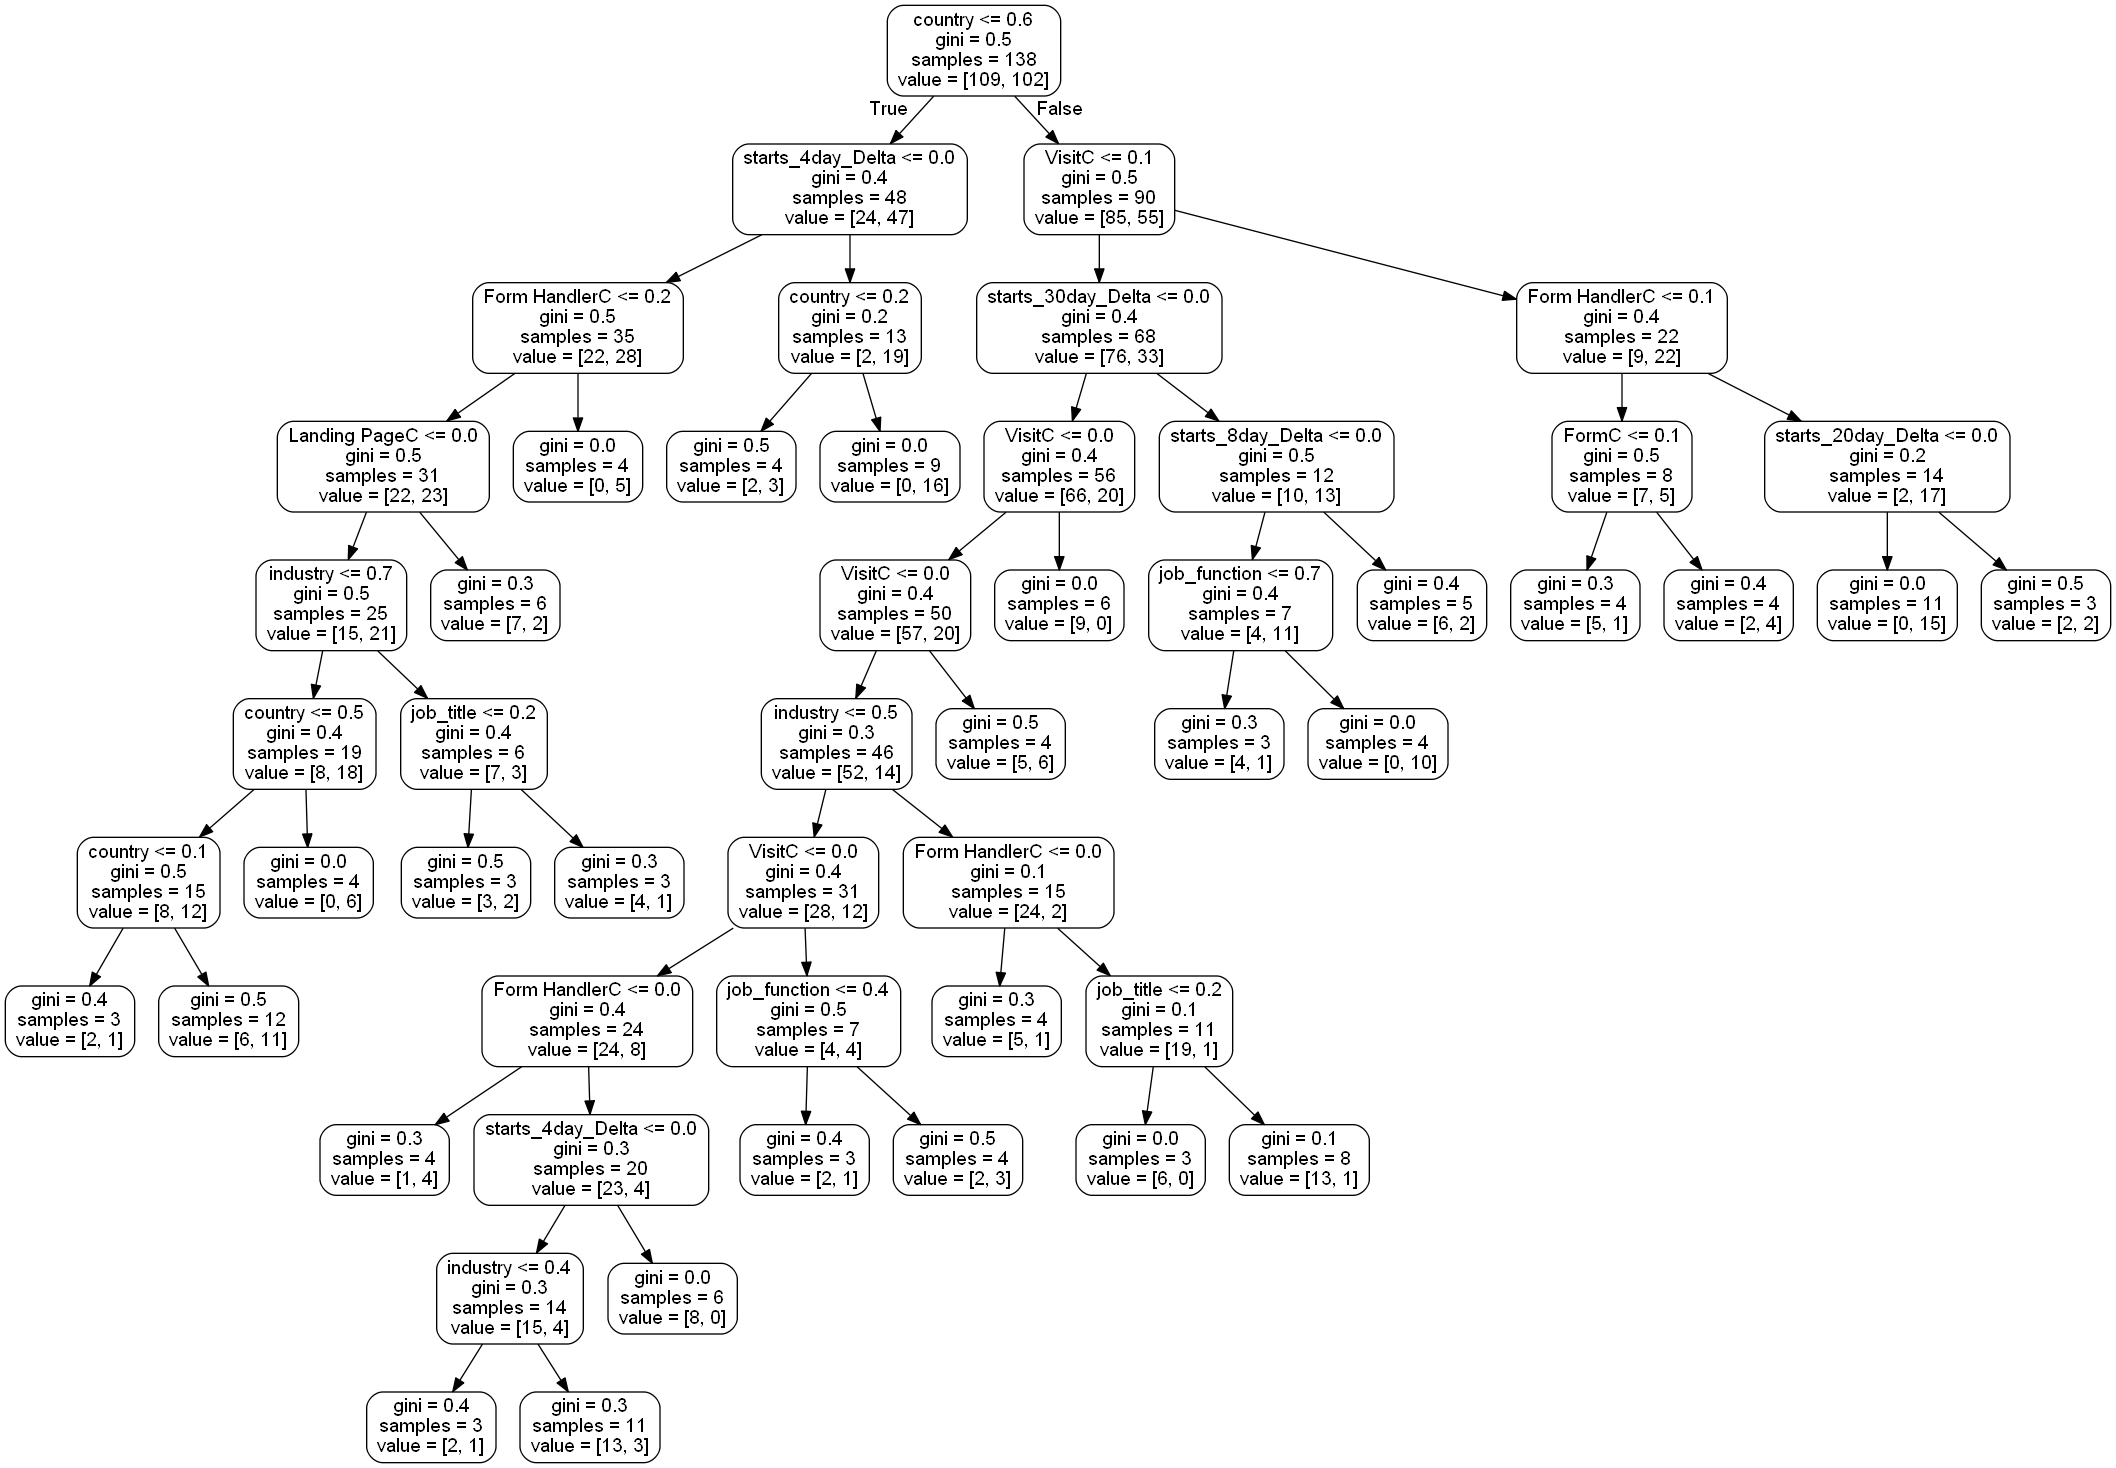

In [36]:
Image(filename = 'tree.png')

In [37]:
importances = list(rf.feature_importances_)
# Creamos una lista de tuplas con las variables y su importancia en el modelo            
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Realizamos un sort descendiente en función de la importancia de las variables                        
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Form HandlerC        Importance: 0.2
Variable: VisitC               Importance: 0.1
Variable: industry             Importance: 0.1
Variable: country              Importance: 0.09
Variable: FormC                Importance: 0.07
Variable: job_function         Importance: 0.07
Variable: job_title            Importance: 0.05
Variable: starts_4day_Delta    Importance: 0.03
Variable: starts_16day_Delta   Importance: 0.03
Variable: starts_28day_Delta   Importance: 0.03
Variable: Page ViewC           Importance: 0.03
Variable: starts_8day_Delta    Importance: 0.02
Variable: starts_22day_Delta   Importance: 0.02
Variable: starts_24day_Delta   Importance: 0.02
Variable: starts_26day_Delta   Importance: 0.02
Variable: starts_30day_Delta   Importance: 0.02
Variable: WebinarC             Importance: 0.02
Variable: starts_6day_Delta    Importance: 0.01
Variable: starts_10day_Delta   Importance: 0.01
Variable: starts_12day_Delta   Importance: 0.01
Variable: starts_14day_Delta   Importance: 

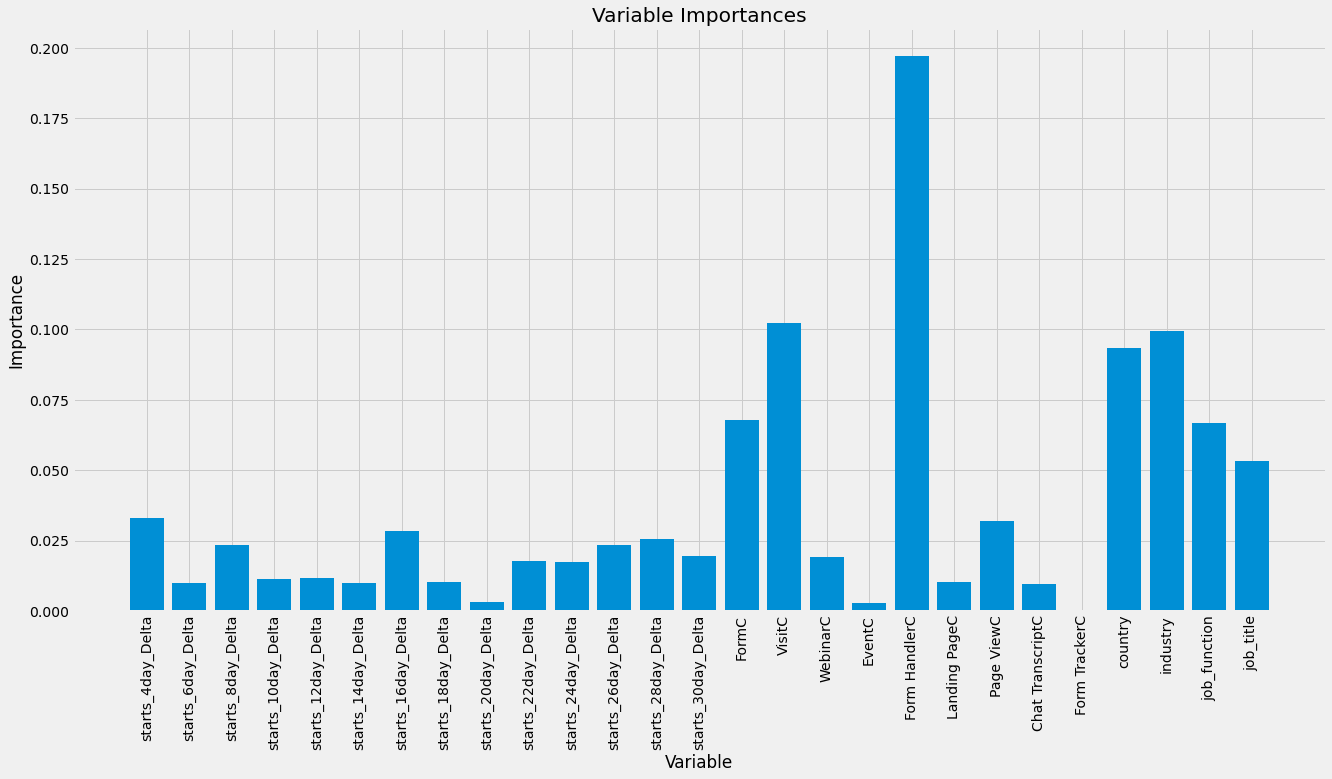

In [38]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Realizamos un histograma con los valores obtenidos del peso de cada variable              

Valores predict

In [39]:
test_regre_norm = test_regre_norm.drop(columns = ["id"])

In [40]:
X1 = test_regre_norm

In [41]:
predict = rf.predict(X1)
predict
# Con los datos proporcionados por la compañía predecimos si los cliente van a comprar el producto 

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.])

In [42]:
predict = pd.DataFrame(predict, columns=  ["Valores Predichos"])
predict["id"] = id
predict.to_excel(r'C:\Users\puil\OneDrive\Escritorio\6.7\6.7_tabla.xlsx', index = False)

In [43]:
predicted_df_rf = pd.merge(predict, test_regre, on='id', how='left')
# Ajuntamos las predicciones a la tabla de datos para obtener una mejor visualización   

In [44]:
display(predicted_df_rf)

,Valores Predichos,id,starts_4day_Delta,starts_6day_Delta,starts_8day_Delta,starts_10day_Delta,starts_12day_Delta,starts_14day_Delta,starts_16day_Delta,starts_18day_Delta,...,EventC,Form HandlerC,Landing PageC,Page ViewC,Chat TranscriptC,Form TrackerC,country,industry,job_function,job_title
0,1.0,1,0,0,1,0,0,0,0,2,...,0,1,0,0,0,0,4,7,4,9
1,1.0,2,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,11,5,7,5
2,1.0,3,1,0,0,0,0,1,0,0,...,0,1,0,2,0,0,14,4,7,5
3,1.0,5,0,0,0,0,0,8,3,1,...,0,0,0,0,0,0,9,3,10,5
4,0.0,6,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,15,10,4,5
5,1.0,7,2,0,0,0,0,0,0,0,...,0,2,0,5,0,0,10,9,3,5
6,1.0,8,1,8,9,0,0,0,0,0,...,0,1,0,0,0,0,15,6,8,11
7,1.0,9,0,8,1,0,0,0,0,0,...,0,1,0,0,0,0,5,7,7,5
8,1.0,10,0,0,0,1,0,0,0,0,...,0,4,0,0,0,0,5,7,10,5
9,0.0,11,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,14,5,8,5


### Xg-boost

In [45]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, eval_metric="auc")
xgb_model.fit(train_features, train_labels, early_stopping_rounds=10, eval_set=[(test_features, test_labels)])
y_pred = xgb_model.predict(test_features)
print("best score: {0}, best iteration: {1}, best ntree limit {2}".format(xgb_model.best_score, xgb_model.best_iteration, xgb_model.best_ntree_limit))


# Creamos una función la cual ejecute un xg_boost classifier, además la función realizara 21 iteraciones quedándose con el mejor accuracy.   

[0]	validation_0-auc:0.65825
[1]	validation_0-auc:0.69832
[2]	validation_0-auc:0.72917
[3]	validation_0-auc:0.72396
[4]	validation_0-auc:0.72276
[5]	validation_0-auc:0.74279
[6]	validation_0-auc:0.73638
[7]	validation_0-auc:0.74319
[8]	validation_0-auc:0.73438
[9]	validation_0-auc:0.73077
[10]	validation_0-auc:0.73397
[11]	validation_0-auc:0.74359
[12]	validation_0-auc:0.74840
[13]	validation_0-auc:0.74119
[14]	validation_0-auc:0.73157
[15]	validation_0-auc:0.73958
[16]	validation_0-auc:0.73878
[17]	validation_0-auc:0.72596
[18]	validation_0-auc:0.72596
[19]	validation_0-auc:0.73077
[20]	validation_0-auc:0.73558
[21]	validation_0-auc:0.73237
best score: 0.748397, best iteration: 12, best ntree limit 13


C:\Users\puil\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\puil\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [46]:
def metricas_xg():
    # Creamos una función que nos permite ver las métricas del modelo
    print(classification_report(test_labels, y_pred))

In [47]:
metricas_xg()

              precision    recall  f1-score   support

         0.0       0.68      0.59      0.63        32
         1.0       0.70      0.77      0.73        39

    accuracy                           0.69        71
   macro avg       0.69      0.68      0.68        71
weighted avg       0.69      0.69      0.69        71



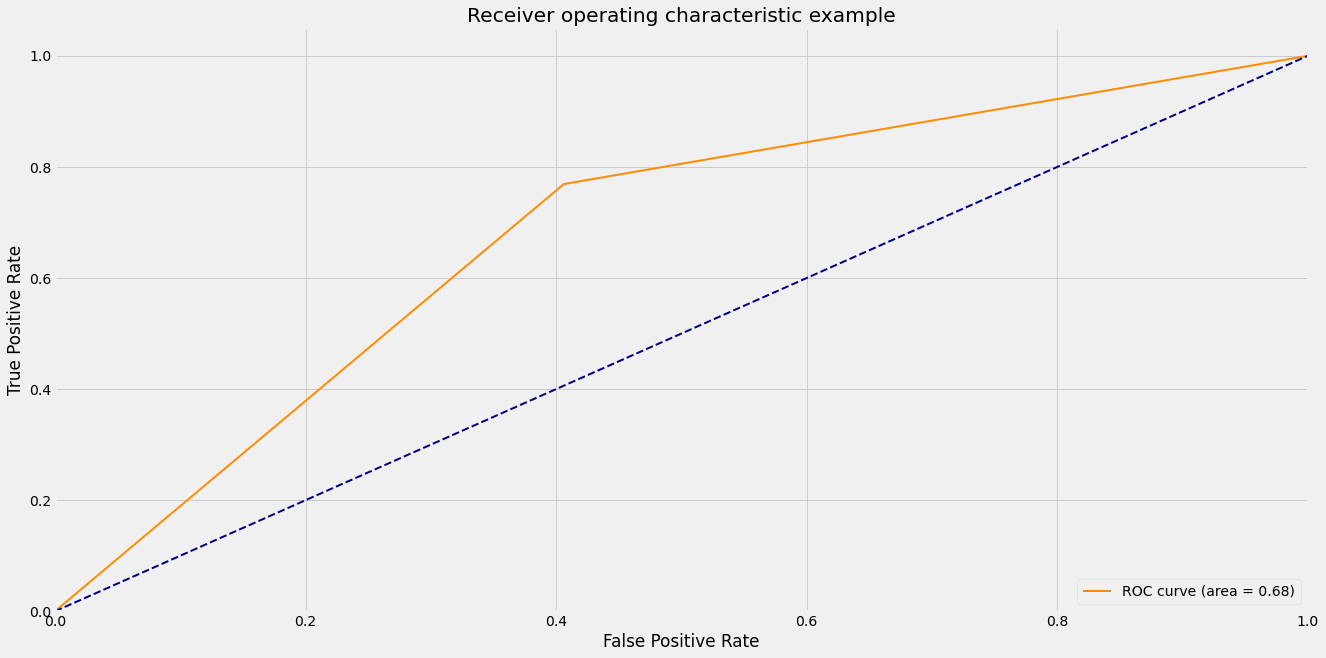

In [54]:
fpr, tpr, thresholds = roc_curve(test_labels, y_pred)
roc_auc1 = auc(fpr, tpr)
performance_auc['Xg-boost'] = roc_auc1

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

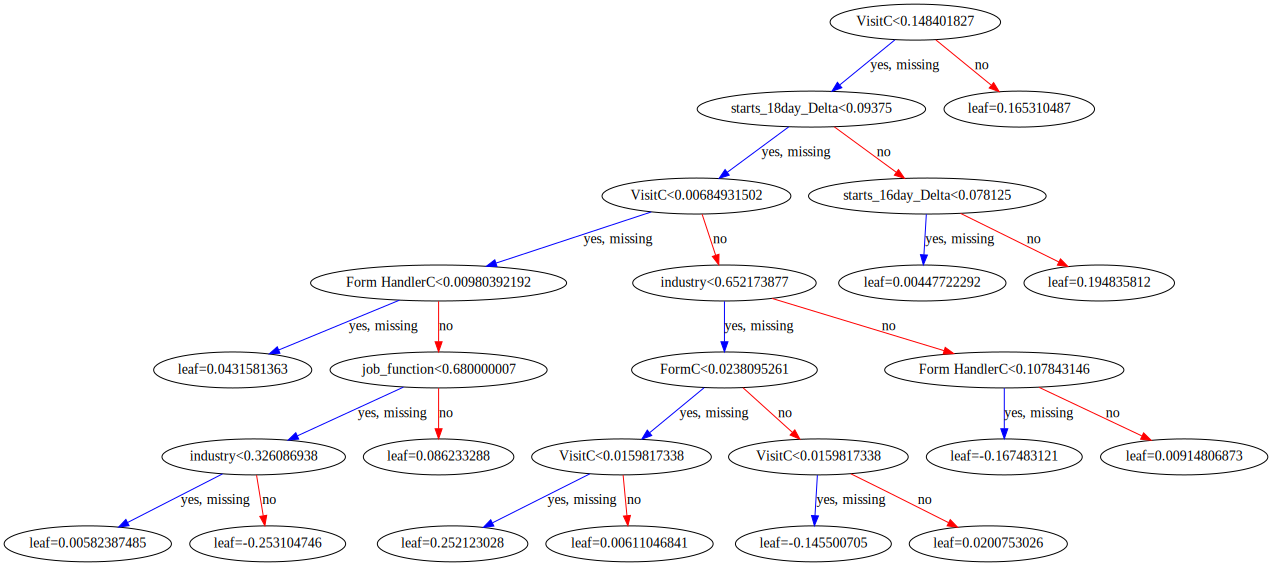

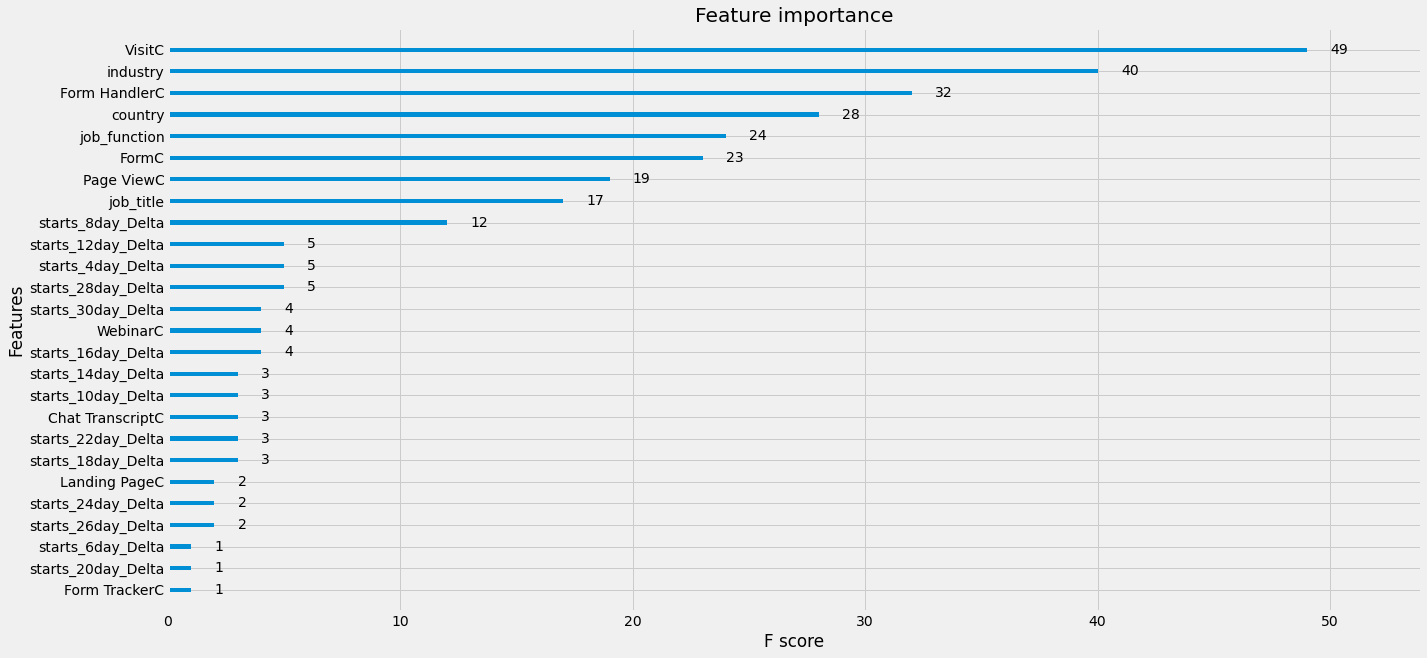

In [49]:
xgb.plot_importance(xgb_model)
xgb.to_graphviz(xgb_model, num_trees=xgb_model.best_iteration)
# Realizamos el grafico del xg_boost con la mejor iteración 

Valores predichos

In [50]:
predict2 = xgb_model.predict(X1)
predict2
# Con los datos proporcionados por la compañía predecimos si los cliente van a comprar el producto 

C:\Users\puil\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.])

In [51]:
predict2 = pd.DataFrame(predict2, columns=  ["Valores Predichos"])
predict2["id"] = id
predict2.to_excel(r'C:\Users\puil\OneDrive\Escritorio\6.7\6.7_tabla.xlsx', index = False)

In [52]:
predicted_df_xg = pd.merge(predict2, test_regre, on='id', how='left')
# Ajuntamos las predicciones a la tabla de datos para obtener una mejor visualización  

In [53]:
display(predicted_df_xg)

,Valores Predichos,id,starts_4day_Delta,starts_6day_Delta,starts_8day_Delta,starts_10day_Delta,starts_12day_Delta,starts_14day_Delta,starts_16day_Delta,starts_18day_Delta,...,EventC,Form HandlerC,Landing PageC,Page ViewC,Chat TranscriptC,Form TrackerC,country,industry,job_function,job_title
0,1.0,1,0,0,1,0,0,0,0,2,...,0,1,0,0,0,0,4,7,4,9
1,0.0,2,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,11,5,7,5
2,0.0,3,1,0,0,0,0,1,0,0,...,0,1,0,2,0,0,14,4,7,5
3,1.0,5,0,0,0,0,0,8,3,1,...,0,0,0,0,0,0,9,3,10,5
4,0.0,6,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,15,10,4,5
5,1.0,7,2,0,0,0,0,0,0,0,...,0,2,0,5,0,0,10,9,3,5
6,1.0,8,1,8,9,0,0,0,0,0,...,0,1,0,0,0,0,15,6,8,11
7,1.0,9,0,8,1,0,0,0,0,0,...,0,1,0,0,0,0,5,7,7,5
8,1.0,10,0,0,0,1,0,0,0,0,...,0,4,0,0,0,0,5,7,10,5
9,0.0,11,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,14,5,8,5


### Comparación 

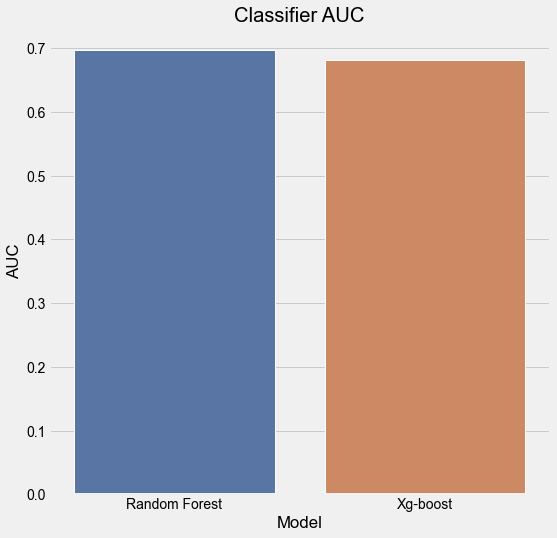

In [55]:
perf = pd.DataFrame.from_dict(performance_auc, orient='index')
perf['Model'] = perf.index
perf['AUC'] = perf[0]
plt.xlabel('AUC')
plt.title('Classifier AUC')
sns.set_theme(style="whitegrid")
sns.barplot(x= "Model", y='AUC', data=perf)
plt.rcParams['figure.figsize'] = [10, 4]